In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from pyvttbl import DataFrame

import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [7]:
FavTeam = pd.read_csv("FavTeamPerc3.csv")
FavTeam.head()

,Market_size,Market_rank,Year,Year.1,% of All Fans Ranking Team As Favorite
0,Big,1,New York Knicks,2013,5.8
1,Big,1,New York Knicks,2015,4.7
2,Big,1,New York Knicks,2016,4.2
3,Big,1,New York Knicks,2017,5.4
4,Big,2,Brooklyn Nets,2013,1.6


In [8]:
big_filter = FavTeam[FavTeam['Market_rank'] <= 10]
big_filter

,Market_size,Market_rank,Year,Year.1,% of All Fans Ranking Team As Favorite
0,Big,1,New York Knicks,2013,5.8
1,Big,1,New York Knicks,2015,4.7
2,Big,1,New York Knicks,2016,4.2
3,Big,1,New York Knicks,2017,5.4
4,Big,2,Brooklyn Nets,2013,1.6
5,Big,2,Brooklyn Nets,2015,1.8
6,Big,2,Brooklyn Nets,2016,0.9
7,Big,2,Brooklyn Nets,2017,1.4
8,Big,3,Los Angeles Lakers,2013,9.3
9,Big,3,Los Angeles Lakers,2015,10.2


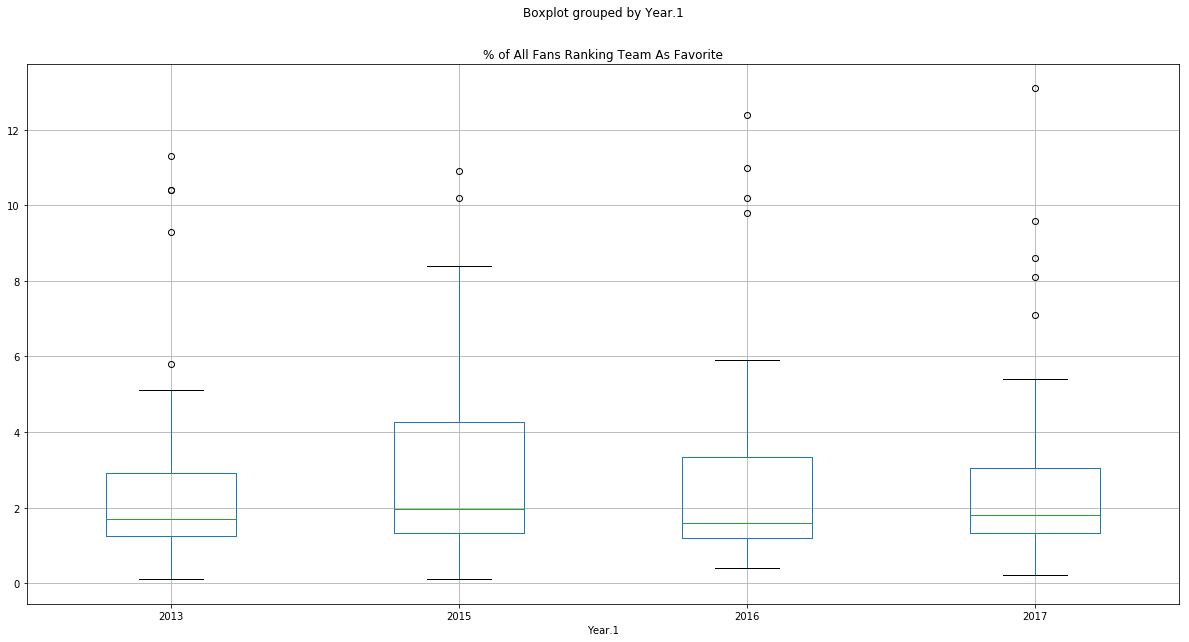

In [9]:
FavTeam.boxplot("% of All Fans Ranking Team As Favorite", by="Year.1", figsize=(20, 10))

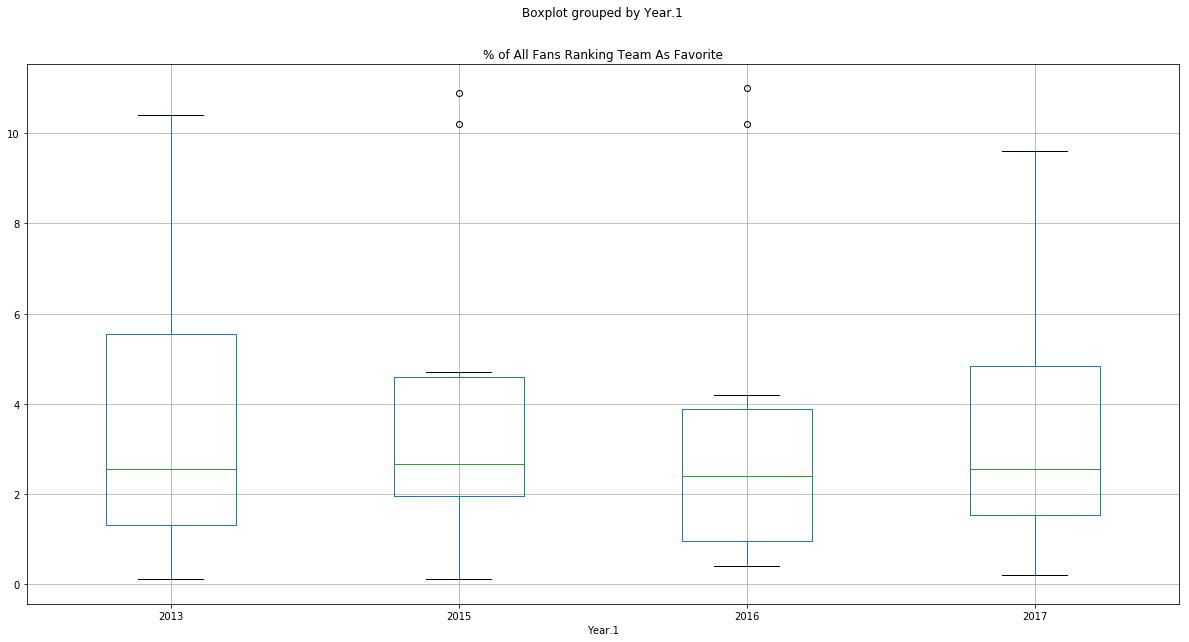

In [28]:
# Create a boxplot to compare means
big_filter.boxplot("% of All Fans Ranking Team As Favorite", by="Year.1", figsize=(20, 10))

In [29]:
mid_filter = FavTeam[(FavTeam['Market_rank'] >10) & (FavTeam['Market_rank'] <=20 )]
mid_filter


,Market_size,Market_rank,Year,Year.1,% of All Fans Ranking Team As Favorite
40,Mid,11,Golden State Warriors,2013,1.6
41,Mid,11,Golden State Warriors,2015,4.8
42,Mid,11,Golden State Warriors,2016,12.4
43,Mid,11,Golden State Warriors,2017,13.1
44,Mid,12,Atlanta Hawks,2013,1.8
45,Mid,12,Atlanta Hawks,2015,2.1
46,Mid,12,Atlanta Hawks,2016,1.5
47,Mid,12,Atlanta Hawks,2017,1.4
48,Mid,13,Boston Celtics,2013,11.3
49,Mid,13,Boston Celtics,2015,8.4


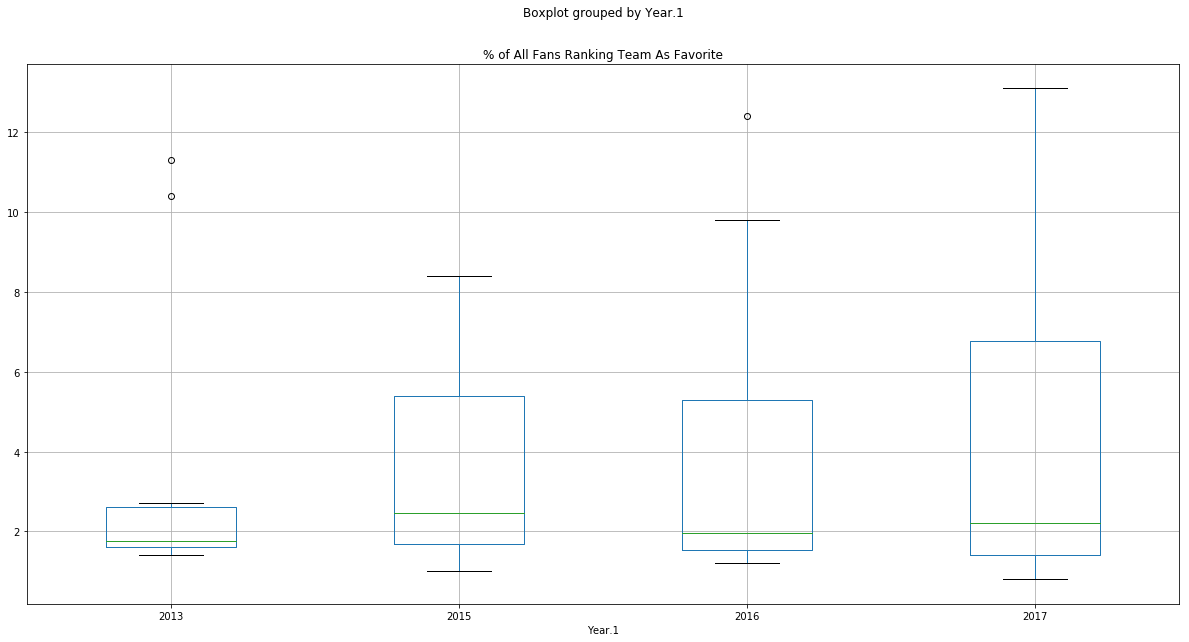

In [30]:
# Create a boxplot to compare means
mid_filter.boxplot("% of All Fans Ranking Team As Favorite", by="Year.1", figsize=(20, 10))

In [31]:
sml_filter = FavTeam[(FavTeam['Market_rank'] >20) & (FavTeam['Market_rank'] <=30 )]
sml_filter

,Market_size,Market_rank,Year,Year.1,% of All Fans Ranking Team As Favorite
80,Small,21,Sacramento Kings,2013,0.5
81,Small,21,Sacramento Kings,2015,1.1
82,Small,21,Sacramento Kings,2016,0.8
83,Small,21,Sacramento Kings,2017,1.1
84,Small,22,Portland Trail Blazers,2013,2.2
85,Small,22,Portland Trail Blazers,2015,2.0
86,Small,22,Portland Trail Blazers,2016,1.6
87,Small,22,Portland Trail Blazers,2017,1.8
88,Small,23,Charlotte Hornets,2013,1.4
89,Small,23,Charlotte Hornets,2015,1.9


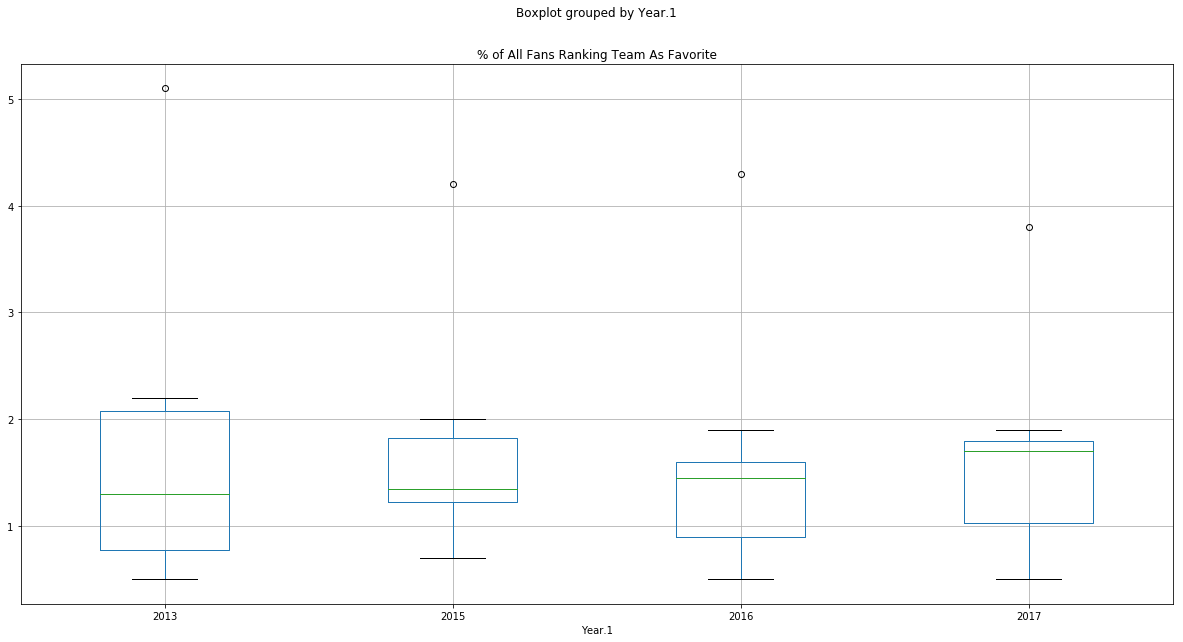

In [32]:
# Create a boxplot to compare means
sml_filter.boxplot("% of All Fans Ranking Team As Favorite", by="Year.1", figsize=(20, 10))

In [33]:
BigM   = FavTeam[FavTeam["Market_size"] == "Big"]["% of All Fans Ranking Team As Favorite"]

MidM   = FavTeam[FavTeam["Market_size"] == "Mid"]["% of All Fans Ranking Team As Favorite"]

SmallM = FavTeam[FavTeam["Market_size"] == "Small"]["% of All Fans Ranking Team As Favorite"]

In [23]:
ANOVA_Test = stats.f_oneway(BigM , MidM , SmallM)
ANOVA_Test

F_onewayResult(statistic=7.658146276849183, pvalue=0.00074902011293344)